In [12]:
#from sklearn.cross_validation import train_test_split, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Initialization

In [7]:
# Column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [8]:
# initialze our dataset
data = pd.read_csv('pima-indians-diabetes.data', names=col_names)

In [9]:
# checking if there is not empty fields (SKL require none empty field)
data.count()

pregnant    768
glucose     768
bp          768
skin        768
insulin     768
bmi         768
pedigree    768
age         768
label       768
dtype: int64

In [5]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# Shape, dimensions

data.shape

(768, 9)

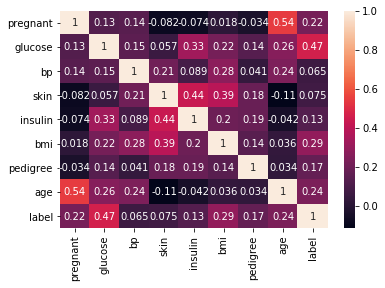

In [13]:
Corr=data[data.columns].corr()
sns.heatmap(Corr,annot=True)

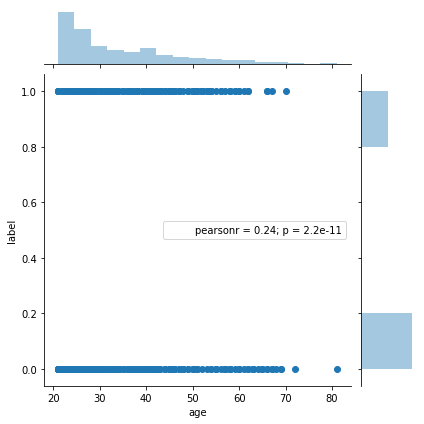

In [226]:
sns.jointplot(data['age'],data['label'])

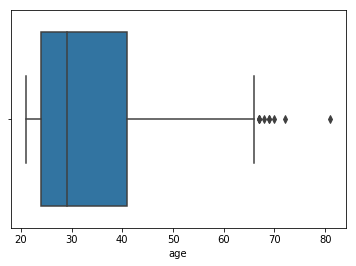

In [228]:
sns.boxplot(data['age'])

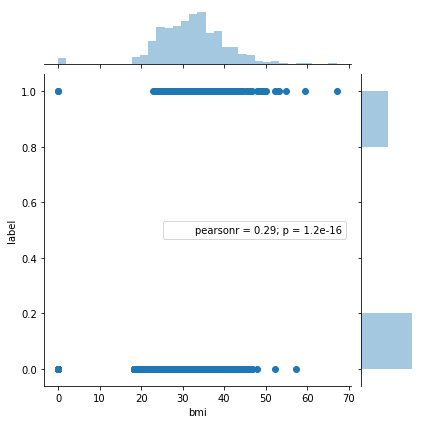

In [238]:

#sns.pairplot(data)
sns.jointplot(data['bmi'],data['label'])

In [119]:
X = data[['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']]
y = data['label']

X1 = data[[ 'glucose', 'bp','insulin', 'age']]
y1 = data['label']

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=109)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 35, random_state=109)

In [265]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(random_state=230)
#DT_Model = DecisionTreeClassifier(random_state=230)
DT_Model.fit(X_train, y_train)
print("Accuracy on Train dataset is:", DT_Model.score(X_train,y_train))
DT_Model.score(X_train,y_train)
print("Accuracy on Test dataset is:", DT_Model.score(X_test,y_test))
#DT_Model.score(X_test,y_test)
DT_Model.feature_importances_

Accuracy on Train dataset is: 1.0
Accuracy on Test dataset is: 0.6948051948051948


array([0.07820128, 0.32316898, 0.08441598, 0.05646268, 0.03299386,
       0.15451308, 0.13649997, 0.13374416])

In [266]:
DT_Model1 = DecisionTreeClassifier(random_state=230)
DT_Model1 = DecisionTreeClassifier(random_state=230, max_depth=5)
DT_Model1.fit(X1_train, y1_train)
print("Accuracy on Train dataset is:", DT_Model1.score(X1_train,y1_train))
print("Accuracy on Test dataset is:", DT_Model1.score(X1_test,y1_test))
#DT_Model.score(X_test,y_test)
DT_Model1.feature_importances_

Accuracy on Train dataset is: 0.791268758526603
Accuracy on Test dataset is: 0.7428571428571429


array([0.62465402, 0.09196246, 0.09570082, 0.1876827 ])

In [204]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,DT_Model.predict(X_test))

array([[187,  11],
       [ 72,  38]], dtype=int64)

In [187]:
#from sklearn.ensemble import RandomForestClassifier
#RF_Model = RandomForestClassifier(n_estimators = 1)
#RF_Model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [206]:
from sklearn.linear_model import LogisticRegression

In [207]:
lm = LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [208]:
lm.coef_

array([[ 1.23473882e-01,  2.40755726e-02, -1.80829974e-02,
        -1.44272215e-05, -6.80780585e-04,  5.19850868e-02,
         4.35111347e-01,  6.68957409e-03]])

In [210]:
lm.score(X_train, y_train)

0.7891304347826087

In [221]:
lm.coef_

#oeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
#oeff_df


array([[ 1.23473882e-01,  2.40755726e-02, -1.80829974e-02,
        -1.44272215e-05, -6.80780585e-04,  5.19850868e-02,
         4.35111347e-01,  6.68957409e-03]])

In [220]:
X.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age'],
      dtype='object')

In [261]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,lm.predict(X_test))

array([[176,  22],
       [ 60,  50]], dtype=int64)

In [263]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lm.predict(X_test)))

             precision    recall  f1-score   support

          0       0.75      0.89      0.81       198
          1       0.69      0.45      0.55       110

avg / total       0.73      0.73      0.72       308

